# Homework Assignment 2 - A Probablistic Naive Bayes Classifier

CSE 575 Section C Fall 2024 Luo

## Description

**This is an individual work.** The project focuses on a subset of the MNIST dataset containing images of digits "0" and "1". The project involves four tasks: feature extraction, parameter calculation, implementation of Naïve Bayes classifiers, and prediction of labels for the test data using the classifiers. Finally, calculating the accuracy of the predictions.

## What packages are allowed / prohibited

You ARE allowed to use fundamental math/stat operators in numpy and math, such as numpy.var, numpy.std, numpy.mean and etc.

You are <font color="red">**NOT allowed**</font> to use functions that directly return Gaussian-dsitribution PDF values or directly use a NB classifier, e.g. scipy.stat.norm, numpy.random.normal, the sklearn library as a whole, or the likes. If we find you use any of those in your source code, your submission will be desk-rejected (receiving a 0). 

## Deliverables

- (7 pts) Your source code in this **HW2.ipynb** that contains all the proper implementations
- (3 pts) A one-page **pdf** report, excluding the cover page if you have one. **You will report all output values (from Step 2 and Step 3) for all the 3 cases given to you**, and record any difficulty or problem you have encountered during the process.

## Evaluation

The ground truths for the given 3 cases will be revealed on Canvas **by Tuesday, Feb 13th**. During grading, we will further assess your program and see if it can pass 2 additional hidden test cases. 

The error range for the PDF values in Step 2 is +-0.2, and the error range for the accuracies in Step 3 is +-0.005 .

## Deadline

2359 hours on Tuesday, Feb 20th aka the Midterm 1 day. No late submissions will be accepted.

In [203]:
# Loading the necessary libraries and data

import numpy as np
import scipy.io
import math

# Loading the training set and the test set given a case number

case = 1 # can also be 0, 1, or 2

Numpyfile0 = scipy.io.loadmat(f'./data/train{case}/digit0_stu_train{case}.mat')
Numpyfile1 = scipy.io.loadmat(f'./data/train{case}/digit1_stu_train{case}.mat')
Numpyfile2 = scipy.io.loadmat('./data/test/digit0_testset.mat')
Numpyfile3 = scipy.io.loadmat('./data/test/digit1_testset.mat')

train0 = Numpyfile0.get('target_img') # Training samples of digit 0
train1 = Numpyfile1.get('target_img') # Training samples of digit 1

test0 = Numpyfile2.get('target_img') # Test samples of digit 0
test1 = Numpyfile3.get('target_img') # Test samples of digit 1

# 1. Feature Extraction - Transforming the Raw Images into 2D

The images of MNIST in its raw form are all 28x28 greyscale pixel values, or 1x784 if flattened. That is way too many dimensions! How can we find a way to represent the images but with far fewer dimensions?

For this project, we will transform all image samples into 2D vectors. You need to first extract features from your original training sets **i.e. train0, train1**, by converting the original data arrays to 2D arrays. The two features out of any image x are defined as following: 

**Feature1 / x_f1:** The average brightness of each image (average all pixel values within a whole image array). 

**Feature2 / x_f2:** The standard deviation of the brightness of each image (standard deviation of all pixel brightness values within a whole image array). 

We assume that these two features are i.i.d and are sampled from Gaussian distributions with regard to all images. Below is a function template you may make use of.

Text(0.5, 0.98, 'Visualizing Dataset')

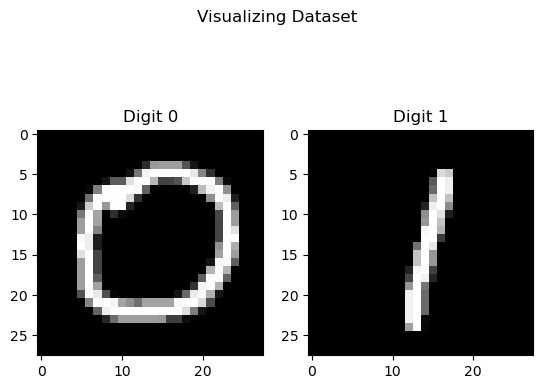

In [197]:
#Visualizing
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)

axs[0].imshow(train0[0], cmap = 'gray')
axs[1].imshow(train1[0], cmap = 'gray')
axs[0].set_title('Digit 0')
axs[1].set_title('Digit 1')
fig.suptitle('Visualizing Dataset')

In [242]:
# Step 1 Template (you are free to modify it at will)

def feat_extract(x):
    assert x.shape == (28, 28)
    # do some feature extraction here
    x_f1 = np.mean(x)
    x_f2 = np.std(x)
    
    return x_f1, x_f2
print('Difficulty encountered - None')

Difficulty encountered - None


# 2. The NB Likehood Parameters are Distributed as Gaussian PDFs

You need to calculate all the parameters for our two-class Naive Bayes (NB) classifier respectively, based upon the 2-D featurized data you have obtained in Step 1. 

**Assuming the two priors P(Y = 0) = P(Y = 1) = 0.5**, we now need to figure out **4 sets of Gaussian PDFs** for the 4 likelihood parameters in order to make predictions. **Remember, you obtain the parameters only from the training sets**:  

1. Mean of Feature1 for digit0 
2. Variance of Feature1 for digit0 
3. Mean of Feature2 for digit0 
4. Variance of Feature2 for digit0 
5. Mean of Feature1 for digit1
6. Variance of Feature1 for digit1 
7. Mean of Feature2 for digit1 
8. Variance of Feature2 for digit1 

**At the end of this step, you need to print out a list that contains these 8 values in the above order.**

Hint: Double check the NB classifier formula, what exactly are the 4 likelihood parameters?

In [244]:
import pandas as pd
# Step 2 Template (you are free to modify it at will)

def gaussian_pdf(mu, var, x_f):
    # plug in the Gaussian PDF formula, given mean, variance, and a specific feature value x_f
    # applies to both feature1 and feature2
    numerator = np.exp(-0.5*(((x_f - mu)**2)/var))
    denom = np.sqrt(2*np.pi*var)
    return numerator/denom

# calculate the 4 mean/variance pairs from the featurized train0 and train1 that define the 4 PDFs
#f1 is the mean of an image's brightness
#f2 is the standard deviation of an image's brightness
global case
cases = [0, 1, 2]


features_df = pd.DataFrame(columns = ['mean_f1_digit0','var_f1_digit0', 'mean_f2_digit0', 'var_f2_digit0', 'mean_f1_digit1', 'var_f1_digit1',\
                                       'mean_f2_digit1', 'var_f2_digit1'])

for case in cases:
    Numpyfile0 = scipy.io.loadmat(f'./data/train{case}/digit0_stu_train{case}.mat')
    Numpyfile1 = scipy.io.loadmat(f'./data/train{case}/digit1_stu_train{case}.mat')
    Numpyfile2 = scipy.io.loadmat('./data/test/digit0_testset.mat')
    Numpyfile3 = scipy.io.loadmat('./data/test/digit1_testset.mat')

    train0 = Numpyfile0.get('target_img') # Training samples of digit 0
    train1 = Numpyfile1.get('target_img') # Training samples of digit 1

    test0 = Numpyfile2.get('target_img') # Test samples of digit 0
    test1 = Numpyfile3.get('target_img') # Test samples of digit 1
    
    #Digit0 Feature1
    mean_f1_digit0 = np.mean(np.fromiter((np.mean(sample) for sample in train0), dtype= 'float'))
    var_f1_digit0 = np.var(np.fromiter((np.mean(sample) for sample in train0), dtype = 'float'))

    #Digit0 Feature2
    mean_f2_digit0 = np.mean(np.fromiter((np.std(sample) for sample in train0), dtype = 'float'))
    var_f2_digit0 = np.var(np.fromiter((np.std(sample) for sample in train0), dtype = 'float'))

    #Digit1 Feature1
    mean_f1_digit1 = np.mean(np.fromiter((np.mean(sample) for sample in train1), dtype= 'float'))
    var_f1_digit1 = np.var(np.fromiter((np.mean(sample) for sample in train1), dtype= 'float'))

    #Digit1 Feature2
    mean_f2_digit1 = np.mean(np.fromiter((np.std(sample) for sample in train1), dtype= 'float'))
    var_f2_digit1 = np.var(np.fromiter((np.std(sample) for sample in train1), dtype= 'float'))
    
    features_df.loc['case'+ str(len(features_df))] = [mean_f1_digit0, var_f1_digit0,
        mean_f2_digit0, var_f2_digit0,
        mean_f1_digit1, var_f1_digit1,
        mean_f2_digit1, var_f2_digit1]

print('Difficulty Encountered - Made mistakes in implementing the formula for gaussian pdf several times!\n\
      Initially I had used a for loop to calculate all the values, thereafter I have constricted each calculation to using inline for loops')
features_df

Difficulty Encountered - Made mistakes in implementing the formula for gaussian pdf several times!
      Initially I had used a for loop to calculate all the values, thereafter I have constricted each calculation to using inline for loops


,mean_f1_digit0,var_f1_digit0,mean_f2_digit0,var_f2_digit0,mean_f1_digit1,var_f1_digit1,mean_f2_digit1,var_f2_digit1
case0,44.214643,115.550259,87.430595,101.468803,19.411020,32.700344,61.386556,84.803712
case1,44.318015,114.934834,87.539378,100.723410,19.409105,30.990618,61.431762,81.506435
case2,44.153454,113.586457,87.395606,100.333752,19.379586,31.234097,61.363748,82.256987


# 3. NB Predictions and Accuracies out of the Test Sets

Once Step 1 and Step 2 are finished, you now have everything to generate predictions for samples in our test sets. We have two test sets in this project: **test0** of all digit 0's, and **test1** of all digit 1's.

Your prediction using a NB classifier is by comparing the two posteriors - P(Y=0|X) vs. P(Y=1|X). For a single test set image X in its raw form, you will obtain the two posteriors by doing 

1. Convert X into the same feature1-feature2 vectors with your feature extractor done in Step 1, then
2. Use the 4 established Gaussian PDFs from Step 2 to obtain the two posteriors and make judgements.

**At the end of this step, you need to print out a two-item list that contains the overall prediction accuracies for test0 and test1. The accuracy values should both be within 0 and 1.**

In [246]:
# Step 3 Template (you are free to modify it at will)
cases = [0, 1, 2]
pdf_df = pd.DataFrame(columns = ['acc0', 'acc1'])
for case in cases:
    # print(case)
    Numpyfile0 = scipy.io.loadmat(f'./data/train{case}/digit0_stu_train{case}.mat')
    Numpyfile1 = scipy.io.loadmat(f'./data/train{case}/digit1_stu_train{case}.mat')
    Numpyfile2 = scipy.io.loadmat('./data/test/digit0_testset.mat')
    Numpyfile3 = scipy.io.loadmat('./data/test/digit1_testset.mat')

    test0 = Numpyfile2.get('target_img') # Test samples of digit 0
    test1 = Numpyfile3.get('target_img') # Test samples of digit 1

    correct0 = 0
    correct1 = 0
    
    for x in test0:
        x_f1, x_f2 = feat_extract(x)
        # obtain prediction and see if it predicts 0
        likelihood0 = gaussian_pdf(features_df.loc['case'+str(case)].mean_f1_digit0, features_df.loc['case'+str(case)].var_f1_digit0, x_f1 )*\
            gaussian_pdf(features_df.loc['case'+str(case)].mean_f2_digit0, features_df.loc['case'+str(case)].var_f2_digit0, x_f2)*0.5
        likelihood1 = gaussian_pdf(features_df.loc['case'+str(case)].mean_f1_digit1, features_df.loc['case'+str(case)].var_f1_digit1, x_f1)*\
            gaussian_pdf(features_df.loc['case'+str(case)].mean_f2_digit1, features_df.loc['case'+str(case)].var_f2_digit1, x_f2)*0.5
        if likelihood0 > likelihood1:
            correct0+=1

    acc0 = correct0 / len(test0)
    for x in test1:
        x_f1, x_f2 = feat_extract(x)
        # obtain prediction and see if it predicts 1
        likelihood1 = gaussian_pdf(features_df.loc['case'+str(case)].mean_f1_digit1, features_df.loc['case'+str(case)].var_f1_digit1, x_f1)*\
            gaussian_pdf(features_df.loc['case'+str(case)].mean_f2_digit1, features_df.loc['case'+str(case)].var_f2_digit1, x_f2)*0.5
        likelihood0 = gaussian_pdf(features_df.loc['case'+str(case)].mean_f1_digit0, features_df.loc['case'+str(case)].var_f1_digit0, x_f1)*\
            gaussian_pdf(features_df.loc['case'+str(case)].mean_f2_digit0, features_df.loc['case'+str(case)].var_f2_digit0, x_f2)*0.5
        if likelihood1 > likelihood0:
            correct1 += 1
    acc1 = correct1 / len(test1)
    pdf_df.loc['case'+str(case)] = [acc0, acc1]

print('Difficulty encountered - I had to gain a good understanding of what exactly we are trying to do, connect the dots between Feature extraction,\n\
      Naives Bayes and PDF. Went through the lecture notes from CSE229 Stanford Course, which helped, went through our lecture slides few times as well\n\
      Calculation itself is fairly simple.')
pdf_df

Difficulty encountered - I had to gain a good understanding of what exactly we are trying to do, connect the dots between Feature extraction,
      Naives Bayes and PDF. Went through the lecture notes from CSE229 Stanford Course, which helped, went through our lecture slides few times as well
      Calculation itself is fairly simple.


,acc0,acc1
case0,0.916327,0.923348
case1,0.917347,0.923348
case2,0.917347,0.923348
